# EDA
___

In [117]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../Data/Movies/IMDB_Movies_cleaned.csv')
df.head()

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,Metropolis,1927,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,780000,1236166,1349711,98.0,471.0,194.0
1,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.5,152716,1500000,19181,32609,99.0,270.0,120.0
2,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5,197969,1500000,163577,445226,96.0,262.0,146.0
3,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,168735,1499000,184925486,184925486,95.0,229.0,166.0
4,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,269664,3977000,200852579,402352579,97.0,808.0,183.0


In [3]:
df.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6459.000000,6459.000000,6459.000000,6.459000e+03,6.459000e+03,6.459000e+03,6.459000e+03,6459.000000,6459.000000,6459.000000
mean,2003.381174,107.951231,6.444682,9.354221e+04,3.048041e+07,4.097111e+07,8.829865e+07,54.955411,297.004800,147.188574
std,11.587292,18.858011,0.986718,1.606785e+05,3.985312e+07,6.704754e+07,1.743236e+08,18.092700,451.897507,124.048523
min,1927.000000,63.000000,1.400000,1.000000e+02,2.000000e+01,9.500000e+01,9.500000e+01,1.000000,1.000000,1.000000
25%,1999.000000,95.000000,5.900000,1.141400e+04,5.749889e+06,1.548588e+06,4.631308e+06,42.000000,74.000000,58.000000
50%,2006.000000,105.000000,6.500000,3.749300e+04,1.600000e+07,1.733637e+07,2.685746e+07,55.000000,164.000000,113.000000
75%,2012.000000,118.000000,7.100000,1.036910e+05,3.800000e+07,5.156309e+07,9.209381e+07,68.000000,339.000000,197.000000
max,2019.000000,272.000000,9.300000,2.159628e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,8302.000000,987.000000


In [4]:
df.loc[df['budget'] <= 200]

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
363,Poltergeist,1982,"Horror, Thriller",114,USA,English,Tobe Hooper,"Steven Spielberg, Michael Grais",Metro-Goldwyn-Mayer (MGM),"Craig T. Nelson, JoBeth Williams, Beatrice Str...",7.3,132785,20,77142388,77142388,79.0,375.0,250.0
6432,Grass,2018,Drama,66,South Korea,Korean,Sang-soo Hong,Sang-soo Hong,Jeonwonsa Film,"Min-hee Kim, Joobong Kee, Jae-hong Ahn, Jin-yo...",6.8,643,82,8084,53503,77.0,1.0,30.0


In [5]:
# Budget for "Pooltergeist" is actually $10.7 (M) - https://www.imdb.com/title/tt0084516/?ref_=nv_sr_srsg_0
# Budfet for "Grass" is technically correct - https://www.imdb.com/title/tt7913172/?ref_=fn_al_tt_1
df.loc[363, 'budget'] = 10_700_000

df.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6459.000000,6459.000000,6459.000000,6.459000e+03,6.459000e+03,6.459000e+03,6.459000e+03,6459.000000,6459.000000,6459.000000
mean,2003.381174,107.951231,6.444682,9.354221e+04,3.048207e+07,4.097111e+07,8.829865e+07,54.955411,297.004800,147.188574
std,11.587292,18.858011,0.986718,1.606785e+05,3.985207e+07,6.704754e+07,1.743236e+08,18.092700,451.897507,124.048523
min,1927.000000,63.000000,1.400000,1.000000e+02,8.200000e+01,9.500000e+01,9.500000e+01,1.000000,1.000000,1.000000
25%,1999.000000,95.000000,5.900000,1.141400e+04,5.768389e+06,1.548588e+06,4.631308e+06,42.000000,74.000000,58.000000
50%,2006.000000,105.000000,6.500000,3.749300e+04,1.600000e+07,1.733637e+07,2.685746e+07,55.000000,164.000000,113.000000
75%,2012.000000,118.000000,7.100000,1.036910e+05,3.800000e+07,5.156309e+07,9.209381e+07,68.000000,339.000000,197.000000
max,2019.000000,272.000000,9.300000,2.159628e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,8302.000000,987.000000


In [6]:
df.loc[df['usa_gross_income'] <= 95]

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4104,The Objective,2008,"Horror, Sci-Fi, Thriller",90,"USA, Morocco","English, Pushto",Daniel Myrick,"Daniel Myrick, Mark A. Patton",Jaz Films,"Jonas Ball, Matthew R. Anderson, Jon Huertas, ...",5.5,7634,4000000,95,95,26.0,67.0,37.0


In [7]:
# according to outside research (IMDB, BoxOfficMojo, RottenTomatoes) the gross is correct, however it's a heavy outlier 
# and is more than likely an error, so it will be droped
df.drop(index=4104, inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6458.000000,6458.000000,6458.000000,6.458000e+03,6.458000e+03,6.458000e+03,6.458000e+03,6458.000000,6458.000000,6458.000000
mean,2003.380458,107.954011,6.444828,9.355551e+04,3.048617e+07,4.097745e+07,8.831232e+07,54.959895,297.040415,147.205636
std,11.588047,18.858148,0.986724,1.606874e+05,3.985380e+07,6.705080e+07,1.743337e+08,18.090512,451.923433,124.050548
min,1927.000000,63.000000,1.400000,1.000000e+02,8.200000e+01,4.230000e+02,4.230000e+02,1.000000,1.000000,1.000000
25%,1999.000000,95.000000,5.900000,1.142525e+04,5.777000e+06,1.556678e+06,4.636574e+06,42.000000,74.250000,58.000000
50%,2006.000000,105.000000,6.500000,3.749450e+04,1.600000e+07,1.733998e+07,2.687465e+07,55.000000,164.000000,113.000000
75%,2012.000000,118.000000,7.100000,1.037115e+05,3.800000e+07,5.157166e+07,9.213769e+07,68.000000,339.000000,197.000000
max,2019.000000,272.000000,9.300000,2.159628e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,8302.000000,987.000000


In [8]:
df.loc[df['worldwide_gross_income'] <= 500]

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
3164,The Dark Hours,2005,"Horror, Thriller",80,Canada,English,Paul Fox,Wil Zmak,Calder Road Films,"Kate Greenhouse, Bruce McFee, Jeff Seymour, Da...",6.0,5165,355000,423,423,63.0,51.0,78.0


In [9]:
# this also appears to be an error so it'll be droped
df.drop(index=3164, inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6457.000000,6457.000000,6457.000000,6.457000e+03,6.457000e+03,6.457000e+03,6.457000e+03,6457.000000,6457.000000,6457.000000
mean,2003.380208,107.958340,6.444897,9.356920e+04,3.049084e+07,4.098380e+07,8.832600e+07,54.958650,297.078519,147.216354
std,11.588927,18.856399,0.986785,1.606961e+05,3.985512e+07,6.705405e+07,1.743437e+08,18.091636,451.948057,124.057165
min,1927.000000,63.000000,1.400000,1.000000e+02,8.200000e+01,5.090000e+02,5.940000e+02,1.000000,1.000000,1.000000
25%,1999.000000,95.000000,5.900000,1.144100e+04,5.777000e+06,1.558836e+06,4.644108e+06,42.000000,75.000000,58.000000
50%,2006.000000,105.000000,6.500000,3.749600e+04,1.600000e+07,1.734360e+07,2.689185e+07,55.000000,164.000000,113.000000
75%,2012.000000,118.000000,7.100000,1.037320e+05,3.800000e+07,5.158024e+07,9.218157e+07,68.000000,339.000000,197.000000
max,2019.000000,272.000000,9.300000,2.159628e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,8302.000000,987.000000


In [10]:
df.loc[df['worldwide_gross_income'] <= 1_000]

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
181,The Last Wave,1977,"Drama, Fantasy, Mystery",106,Australia,"English, Italian, Aboriginal",Peter Weir,"Peter Weir, Tony Morphett",McElroy & McElroy,"Richard Chamberlain, Olivia Hamnett, David Gul...",7.1,7959,518400,957,957,85.0,52.0,68.0
2329,The Jimmy Show,2001,"Comedy, Drama",96,USA,English,Frank Whaley,"Jonathan Marc Sherman, Frank Whaley",Next Wednesday Productions,"Frank Whaley, Carla Gugino, Ethan Hawke, Lynn ...",5.2,514,1500000,1000,1000,39.0,20.0,9.0
3147,Steve + Sky,2004,"Romance, Drama, Comedy",97,Belgium,Dutch,Felix van Groeningen,Felix van Groeningen,Favourite Films NV,"Titus De Voogdt, Delfine Bafort, Johan Heldenb...",6.7,1000,817500,624,624,44.0,4.0,12.0
3642,Shake Hands with the Devil,2007,"Drama, History, War",112,Canada,"English, French",Roger Spottiswoode,"Roméo Dallaire, Michael Donovan",Barna-Alper Productions,"Roy Dupuis, Owen Sejake, James Gallanders, Mic...",7.6,3084,7810000,594,594,57.0,18.0,21.0
5123,Edwin Boyd,2011,"Crime, Drama",105,Canada,English,Nathan Morlando,Nathan Morlando,IFC Films,"Scott Speedman, Kelly Reilly, Kevin Durand, Jo...",6.2,4057,5000000,625,625,56.0,20.0,33.0


In [11]:
# "The Last Wave" worldwide gross is for a release and the original box office gross is not know, so drop it
# https://www.boxofficemojo.com/title/tt0076299/?ref_=bo_se_r_1

# due to inconsistancies "The Jimmy Show" will also be droped
# the rest are fine

df.drop(index=[181, 2329], inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6455.000000,6455.000000,6455.000000,6.455000e+03,6.455000e+03,6.455000e+03,6.455000e+03,6455.000000,6455.000000,6455.000000
mean,2003.384663,107.960496,6.444988,9.359688e+04,3.049997e+07,4.099650e+07,8.835337e+07,54.956468,297.159411,147.250039
std,11.586031,18.858717,0.986782,1.607133e+05,3.985791e+07,6.706056e+07,1.743638e+08,18.089484,451.994617,124.060533
min,1927.000000,63.000000,1.400000,1.000000e+02,8.200000e+01,5.090000e+02,5.940000e+02,1.000000,1.000000,1.000000
25%,1999.000000,95.000000,5.900000,1.146200e+04,5.788500e+06,1.568678e+06,4.644498e+06,42.000000,75.000000,58.000000
50%,2006.000000,105.000000,6.500000,3.756400e+04,1.600000e+07,1.736802e+07,2.689548e+07,55.000000,164.000000,113.000000
75%,2012.000000,118.000000,7.100000,1.037355e+05,3.800000e+07,5.159012e+07,9.223271e+07,68.000000,339.500000,197.000000
max,2019.000000,272.000000,9.300000,2.159628e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,8302.000000,987.000000


___
## production_company dummy

In [12]:
df['production_company'].value_counts()

Universal Pictures          296
Warner Bros.                291
Columbia Pictures           284
Paramount Pictures          273
Twentieth Century Fox       207
                           ... 
The Zanuck Company            1
Chris Morgan Productions      1
Point Park University         1
Esperanto Kino                1
Blue Magic Pictures           1
Name: production_company, Length: 2384, dtype: int64

In [13]:
# creating dummies for production_company
pc_dummy_df = pd.get_dummies(df['production_company']).add_prefix('prod_co-')
pc_dummy_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace= True)
pc_dummy_df.head()

,"prod_co-""dia""_productions_gmbh_&_co._kg",prod_co-100%_synthetic_films,prod_co-10th_hole_productions,prod_co-120db_films,prod_co-1212_entertainment,prod_co-13_productions,prod_co-1492_pictures,prod_co-1818_productions,prod_co-1821_pictures,prod_co-19_entertainment,...,prod_co-zonbo_media,prod_co-zucker_brothers_productions,prod_co-double_a_films,prod_co-erbp,prod_co-here!_films,prod_co-i_am_other,prod_co-i5_films,prod_co-micro_scope,prod_co-nwave_pictures,prod_co-thefyzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___
## genre dummy

In [14]:
genre_dummy_df = df['genre'].map(lambda x: x.split(', ')).str.join('|').str.get_dummies().add_prefix('genre-')
genre_dummy_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)
genre_dummy_df.head()

,genre-action,genre-adventure,genre-animation,genre-biography,genre-comedy,genre-crime,genre-drama,genre-family,genre-fantasy,genre-film-noir,...,genre-horror,genre-music,genre-musical,genre-mystery,genre-romance,genre-sci-fi,genre-sport,genre-thriller,genre-war,genre-western
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


___
## country dummy

In [15]:
country_dum_df = df['country'].map(lambda x: x.split(', ')).str.join('|').str.get_dummies().add_prefix('country-')
country_dum_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace = True)
country_dum_df.head()

,country-afghanistan,country-algeria,country-angola,country-argentina,country-aruba,country-australia,country-austria,country-bahamas,country-belgium,country-bhutan,...,country-turkey,country-uk,country-usa,country-ukraine,country-united_arab_emirates,country-uruguay,country-venezuela,country-vietnam,country-west_germany,country-yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


___
## writer dummy

In [16]:
writer_dum_df = df['writer'].map(lambda x: x.split(', ')).str.join('|').str.get_dummies().add_prefix('writer-')
writer_dum_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace = True)
writer_dum_df.head()

,writer-'a.j.'_marriot,writer-'weird_al'_yankovic,writer-a_l_katz,writer-a.a._milne,writer-a.e._hotchner,writer-a.e.w._mason,writer-a.j._quinnell,writer-a.s._byatt,writer-aaron_abrams,writer-aaron_covington,...,writer-zoë_lund,writer-àlex_pastor,writer-álex_de_la_iglesia,writer-álvaro_rodríguez,writer-élie_chouraqui,writer-émile_gaudreault,writer-émile_zola,writer-éric_rohmer,writer-éric_toledano,writer-ólafur_egilsson
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___
## language dummy

In [17]:
lang_dum_df = df['language'].map(lambda x: x.replace(', ', '|')).str.get_dummies().add_prefix('language-')
lang_dum_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace = True)
lang_dum_df.head()

,language-aboriginal,language-acholi,language-afrikaans,language-akan,language-albanian,language-algonquin,language-american_sign_language,language-amharic,language-ancient_(to_1453),language-apache_languages,...,language-urdu,language-uzbek,language-vietnamese,language-visayan,language-washoe,language-welsh,language-xhosa,language-yiddish,language-yoruba,language-zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___
## director dummy

In [18]:
dir_dum_df = df['director'].map(lambda x: x.replace(', ', '|')).str.get_dummies().add_prefix('director-')
dir_dum_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)
dir_dum_df.head()

,director-aaron_blaise,director-aaron_horvath,director-aaron_schneider,director-aaron_seltzer,director-aaron_sorkin,director-aaron_wilson,director-aaron_woodley,director-abbas_kiarostami,director-abby_kohn,director-abdellah_taia,...,director-zhangke_jia,director-ziad_doueiri,director-zoe_r._cassavetes,director-ágnes_hranitzky,director-álex_de_la_iglesia,director-élie_chouraqui,director-émile_gaudreault,director-éric_rohmer,director-éric_toledano,director-éric_warin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___
## actors dummy

In [19]:
actor_dum_df = df['actors'].map(lambda x: x.replace(', ', '|')).str.get_dummies().add_prefix('actor-')
actor_dum_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)
actor_dum_df.head()

,actor-'cousin_brucie'_morrow,actor-'squeeks'_the_caterpillar,actor-'weird_al'_yankovic,actor-50_cent,actor-a_martinez,actor-a._cheron_hall,actor-a._delon_ellis_jr.,actor-a._jay_radcliff,actor-a._kwesi_compson,actor-a._lee_morris,...,actor-óscar_casas,actor-óscar_flores_guerrero,actor-óscar_jaenada,actor-óscar_lara,actor-óscar_zafra,actor-özay_fecht,actor-ørjan_gamst,actor-þorsteinn_bachmann,actor-þorsteinn_gunnarsson,actor-þröstur_leó_gunnarsson
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___
# Let's try a SLR

In [20]:
df.head()

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,Metropolis,1927,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,780000,1236166,1349711,98.0,471.0,194.0
1,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.5,152716,1500000,19181,32609,99.0,270.0,120.0
2,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5,197969,1500000,163577,445226,96.0,262.0,146.0
3,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,168735,1499000,184925486,184925486,95.0,229.0,166.0
4,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,269664,3977000,200852579,402352579,97.0,808.0,183.0


In [21]:
df.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6455.000000,6455.000000,6455.000000,6.455000e+03,6.455000e+03,6.455000e+03,6.455000e+03,6455.000000,6455.000000,6455.000000
mean,2003.384663,107.960496,6.444988,9.359688e+04,3.049997e+07,4.099650e+07,8.835337e+07,54.956468,297.159411,147.250039
std,11.586031,18.858717,0.986782,1.607133e+05,3.985791e+07,6.706056e+07,1.743638e+08,18.089484,451.994617,124.060533
min,1927.000000,63.000000,1.400000,1.000000e+02,8.200000e+01,5.090000e+02,5.940000e+02,1.000000,1.000000,1.000000
25%,1999.000000,95.000000,5.900000,1.146200e+04,5.788500e+06,1.568678e+06,4.644498e+06,42.000000,75.000000,58.000000
50%,2006.000000,105.000000,6.500000,3.756400e+04,1.600000e+07,1.736802e+07,2.689548e+07,55.000000,164.000000,113.000000
75%,2012.000000,118.000000,7.100000,1.037355e+05,3.800000e+07,5.159012e+07,9.223271e+07,68.000000,339.500000,197.000000
max,2019.000000,272.000000,9.300000,2.159628e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,8302.000000,987.000000


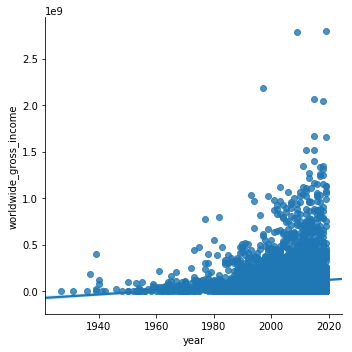

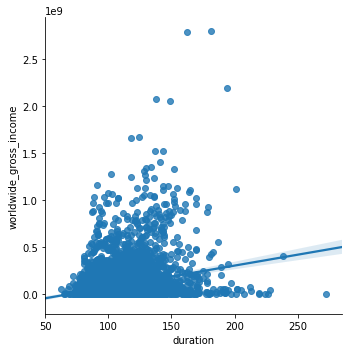

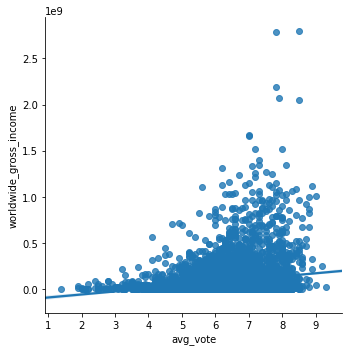

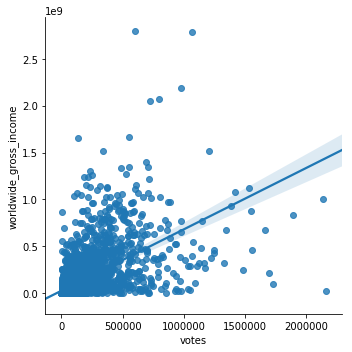

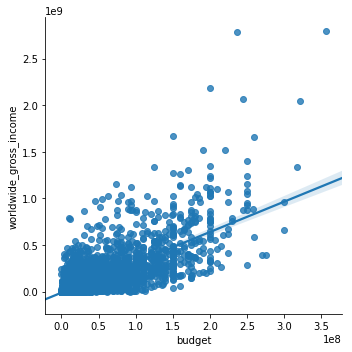

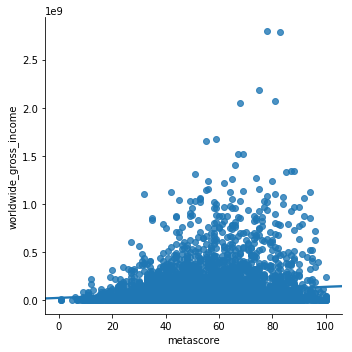

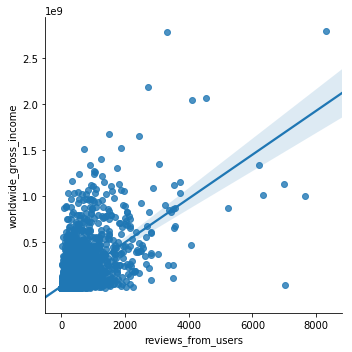

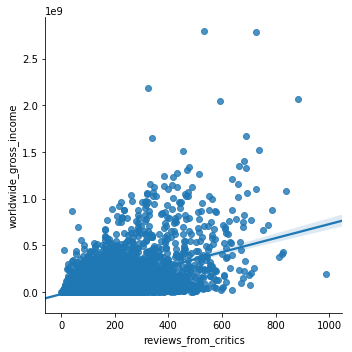

In [32]:

for col in [col for col in df.describe().columns if col not in ['usa_gross_income', 'worldwide_gross_income']]:
    sns.lmplot(x=col, y='worldwide_gross_income', data=df)
    plt.show();

looks as though budget might be our best predictor of worldwide_gross_income

Build a function that will take in two lists, Y and X, and return the intercept and slope coefficients that minimize SSE.

In [33]:
# taken from GA notes, 3.01 - lab
def lin_reg(x,y):
    # Using other libraries for standard deviation and the Pearson correlation coefficient.
    # Note that in SLR, the correlation coefficient multiplied by the standard
    # deviation of y divided by standard deviation of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    
    # The Pearson correlation coefficient returns a tuple, so it needs to be sliced/indexed.
    # The optimal beta is found by: mean(y) - b1 * mean(x).
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    return beta_0, beta_1

In [36]:
lin_reg(df['budget'].values, df['worldwide_gross_income'].values)

(-10927843.723368704, 3.2551247238816017)

This means a SLR (simple linear regression) using budget as the sole predictor for worldwide_gross_income would say that the Y intercept is -10,927,844 and slope of 3.26. One way to interpret this would be to say for every 1 dollar increase in budget, the worldwide_gross_income would also increase by 3.26 dollars
___
using this simple model let's calculate and plot the residuals

In [41]:
y_intercept, slope = lin_reg(df['budget'].values, df['worldwide_gross_income'].values)

# simple y = mx + b to make predictions
y_pred = df['budget'].values * slope + y_intercept

# residuals are how far off our predictions really are
resids = abs(df['worldwide_gross_income'].values - y_pred)
resids.mean()

59689841.742328346

The average of our residuals means that, on average, our predictions are off by about $59,689,841

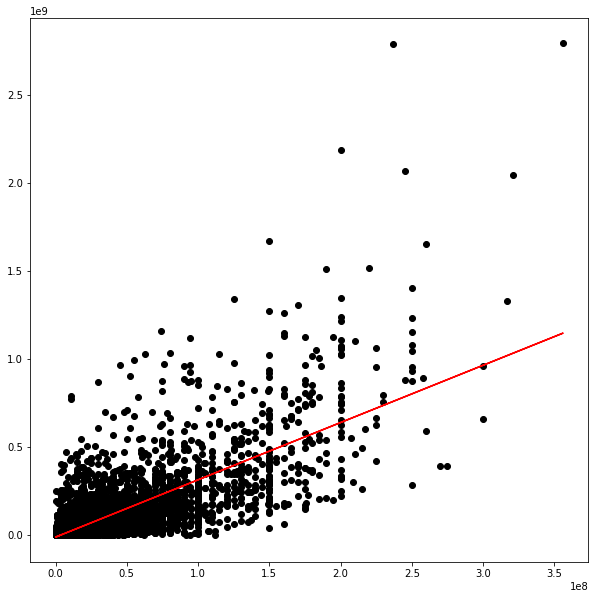

In [87]:
df['preds'] = y_pred

# plot our predictions compared to the actuals
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

ax.scatter(x=df['budget'], y=df['worldwide_gross_income'], c='k')
ax.plot(df['budget'].values, df['preds'].values, color='r')

plt.show()

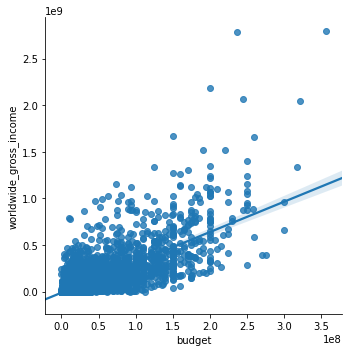

In [81]:
# same plot done with seaborn
sns.lmplot(x='budget', y='worldwide_gross_income', data=df);

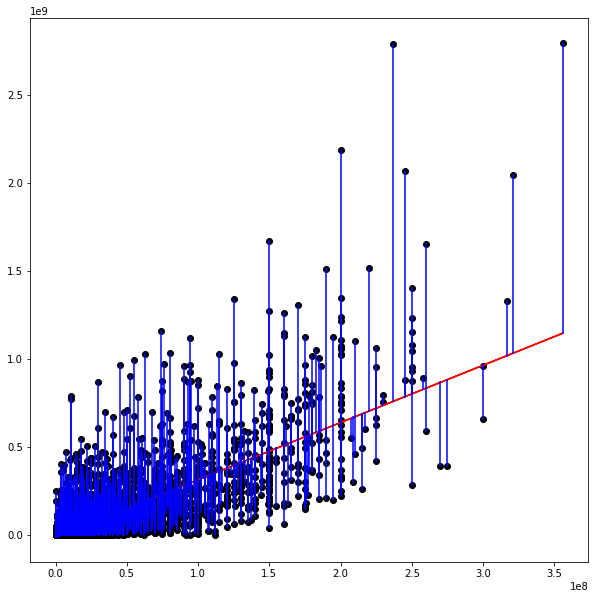

In [83]:
# plot our residuals
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

ax.scatter(x=df['budget'], y=df['worldwide_gross_income'], c='k')
ax.plot(df['budget'].values, df['preds'].values, color='r')

for _, row in df.iterrows():
    plt.plot((row['budget'], row['budget']), (row['worldwide_gross_income'], row['preds']), 'b-')

We can see from our residuals that our predictions are getting more and more off the farther out we go.

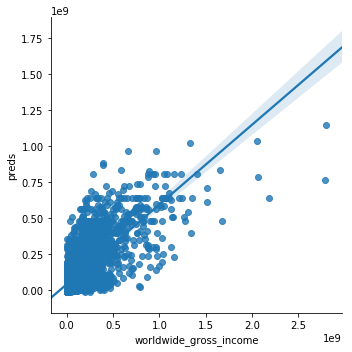

In [85]:
sns.lmplot(x='worldwide_gross_income', y='preds', data=df);

this plot is showing us that our SLR model is under-shooting the worldwide_gross_income of movies with very high worldwide gross
___
## Combining our dummy data to the main df

In [95]:
# genre
df.head()

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics,preds
0,Metropolis,1927,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,780000,1236166,1349711,98.0,471.0,194.0,-8.388846e+06
1,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.5,152716,1500000,19181,32609,99.0,270.0,120.0,-6.045157e+06
2,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5,197969,1500000,163577,445226,96.0,262.0,146.0,-6.045157e+06
3,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,168735,1499000,184925486,184925486,95.0,229.0,166.0,-6.048412e+06
4,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,269664,3977000,200852579,402352579,97.0,808.0,183.0,2.017787e+06


In [98]:
df_dummied = pd.concat([
    df,
    country_dum_df,
    lang_dum_df,
    dir_dum_df,
    writer_dum_df,
    genre_dummy_df,
    pc_dummy_df,
    actor_dum_df,
    
], axis=1).drop(columns=['genre', 'language', 'country', 'director', 'writer', 'production_company', 'actors'])

df_dummied.dtypes

title                            object
year                              int64
duration                          int64
avg_vote                        float64
votes                             int64
                                 ...   
actor-özay_fecht                  int64
actor-ørjan_gamst                 int64
actor-þorsteinn_bachmann          int64
actor-þorsteinn_gunnarsson        int64
actor-þröstur_leó_gunnarsson      int64
Length: 57824, dtype: object

In [99]:
df_dummied.head()

,title,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,...,actor-óscar_casas,actor-óscar_flores_guerrero,actor-óscar_jaenada,actor-óscar_lara,actor-óscar_zafra,actor-özay_fecht,actor-ørjan_gamst,actor-þorsteinn_bachmann,actor-þorsteinn_gunnarsson,actor-þröstur_leó_gunnarsson
0,Metropolis,1927,153,8.3,148396,780000,1236166,1349711,98.0,471.0,...,0,0,0,0,0,0,0,0,0,0
1,City Lights,1931,87,8.5,152716,1500000,19181,32609,99.0,270.0,...,0,0,0,0,0,0,0,0,0,0
2,Modern Times,1936,87,8.5,197969,1500000,163577,445226,96.0,262.0,...,0,0,0,0,0,0,0,0,0,0
3,Snow White and the Seven Dwarfs,1937,83,7.6,168735,1499000,184925486,184925486,95.0,229.0,...,0,0,0,0,0,0,0,0,0,0
4,Gone with the Wind,1939,238,8.1,269664,3977000,200852579,402352579,97.0,808.0,...,0,0,0,0,0,0,0,0,0,0


___
## Polynomial Features

In [105]:
df.drop(columns='preds', inplace=True) # drop our previous predictions
df.head()

KeyError: "['preds'] not found in axis"

In [106]:
df.head()

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,Metropolis,1927,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,780000,1236166,1349711,98.0,471.0,194.0
1,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.5,152716,1500000,19181,32609,99.0,270.0,120.0
2,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5,197969,1500000,163577,445226,96.0,262.0,146.0
3,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,168735,1499000,184925486,184925486,95.0,229.0,166.0
4,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,269664,3977000,200852579,402352579,97.0,808.0,183.0


In [108]:
poly_features = ['year', 'duration', 'avg_vote', 'votes', 'budget', 'metascore', 'reviews_from_users',
                 'reviews_from_critics']

In [116]:
# Set up our X and ys
X = df[poly_features]
y_usa = df['usa_gross_income']
y_ww = df['worldwide_gross_income']

# create some polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
Xpoly = poly.fit_transform(X)

poly_df = pd.DataFrame(data=Xpoly, columns=poly.get_feature_names(X.columns))
poly_df.head()

,year,duration,avg_vote,votes,budget,metascore,reviews_from_users,reviews_from_critics,year^2,year duration,...,budget^2,budget metascore,budget reviews_from_users,budget reviews_from_critics,metascore^2,metascore reviews_from_users,metascore reviews_from_critics,reviews_from_users^2,reviews_from_users reviews_from_critics,reviews_from_critics^2
0,1927.0,153.0,8.3,148396.0,780000.0,98.0,471.0,194.0,3713329.0,294831.0,...,6.084000e+11,76440000.0,3.673800e+08,151320000.0,9604.0,46158.0,19012.0,221841.0,91374.0,37636.0
1,1931.0,87.0,8.5,152716.0,1500000.0,99.0,270.0,120.0,3728761.0,167997.0,...,2.250000e+12,148500000.0,4.050000e+08,180000000.0,9801.0,26730.0,11880.0,72900.0,32400.0,14400.0
2,1936.0,87.0,8.5,197969.0,1500000.0,96.0,262.0,146.0,3748096.0,168432.0,...,2.250000e+12,144000000.0,3.930000e+08,219000000.0,9216.0,25152.0,14016.0,68644.0,38252.0,21316.0
3,1937.0,83.0,7.6,168735.0,1499000.0,95.0,229.0,166.0,3751969.0,160771.0,...,2.247001e+12,142405000.0,3.432710e+08,248834000.0,9025.0,21755.0,15770.0,52441.0,38014.0,27556.0
4,1939.0,238.0,8.1,269664.0,3977000.0,97.0,808.0,183.0,3759721.0,461482.0,...,1.581653e+13,385769000.0,3.213416e+09,727791000.0,9409.0,78376.0,17751.0,652864.0,147864.0,33489.0


In [125]:
# next step is to combine the poly_df with the dummy_df
df = pd.concat([df_dummied.drop(
                        columns=['year',
                                 'duration',
                                 'avg_vote',
                                 'votes','budget',
                                 'metascore',
                                 'reviews_from_users',
                                 'reviews_from_critics',
                                 'preds']),
         poly_df],
         axis=1)
df.head()

,title,usa_gross_income,worldwide_gross_income,country-afghanistan,country-algeria,country-angola,country-argentina,country-aruba,country-australia,country-austria,...,budget^2,budget metascore,budget reviews_from_users,budget reviews_from_critics,metascore^2,metascore reviews_from_users,metascore reviews_from_critics,reviews_from_users^2,reviews_from_users reviews_from_critics,reviews_from_critics^2
0,Metropolis,1236166,1349711,0,0,0,0,0,0,0,...,6.084000e+11,76440000.0,3.673800e+08,151320000.0,9604.0,46158.0,19012.0,221841.0,91374.0,37636.0
1,City Lights,19181,32609,0,0,0,0,0,0,0,...,2.250000e+12,148500000.0,4.050000e+08,180000000.0,9801.0,26730.0,11880.0,72900.0,32400.0,14400.0
2,Modern Times,163577,445226,0,0,0,0,0,0,0,...,2.250000e+12,144000000.0,3.930000e+08,219000000.0,9216.0,25152.0,14016.0,68644.0,38252.0,21316.0
3,Snow White and the Seven Dwarfs,184925486,184925486,0,0,0,0,0,0,0,...,2.247001e+12,142405000.0,3.432710e+08,248834000.0,9025.0,21755.0,15770.0,52441.0,38014.0,27556.0
4,Gone with the Wind,200852579,402352579,0,0,0,0,0,0,0,...,1.581653e+13,385769000.0,3.213416e+09,727791000.0,9409.0,78376.0,17751.0,652864.0,147864.0,33489.0


In [127]:
# next step is to split up our data into training and testing data.
X_usa_train, y_usa_train, X_usa_test, y_usa_test = train_test_split(
                                                                    df.drop(
                                                                        ['title',
                                                                         'usa_gross_income',
                                                                         'worldwide_gross_income'], axis=1),
                                                                    y_usa,
                                                                    test_size = .8,
                                                                    random_state = 42)

In [128]:
X_usa_train.shape

(1291, 57856)

In [129]:
y_usa_train.shape

(5164, 57856)

In [130]:
X_usa_test.shape

(1291,)

In [131]:
y_usa_test.shape

(5164,)

In [141]:
X_usa_test.values

array([140539099,  36230219,  44089964, ...,    262075,  49008662,
        66666062])

In [138]:
# next step is to scale our data. yes, we should be scaling our dummy data
ss = StandardScaler()

Z_usa_train = ss.fit_transform(X_usa_train.values)
Z_usa_test = ss.transform(X_usa_test.values)

ValueError: Expected 2D array, got 1D array instead:
array=[1.40539099e+08 3.62302190e+07 4.40899640e+07 ... 2.62075000e+05
 4.90086620e+07 6.66660620e+07].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.